# Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. In the following plot you can see an example: naive Bayes roughly converges to a low score.

* http://scikit-learn.org/0.17/modules/learning_curve.html
* http://scikit-learn.org/0.17/auto_examples/model_selection/plot_learning_curve.html

In [73]:
# ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']TkAgg
%matplotlib inline

In [46]:
import numpy as np
# Dataset
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
# Estimators
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Plotting
import matplotlib.pyplot as plt

In [47]:
digits = load_digits()
X, y = digits.data, digits.target

In [48]:
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [8]:
print digits['DESCR']

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [92]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimator = GaussianNB()

In [93]:
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

In [94]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

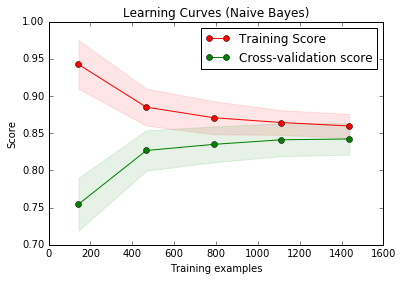

In [95]:
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, '-o', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean,  '-o', color='g', label='Cross-validation score')
plt.legend(loc='best')

We will probably have to use an estimator or a parametrization of the current estimator that can learn more complex concepts (i.e. has a lower bias). If the training score is much greater than the validation score for the maximum number of training samples, adding more training samples will most likely increase generalization. In the following plot you can see that the SVM could benefit from more training examples.

***

In [85]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(digits.data.shape[0], n_iter=10,
                  test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)

In [86]:
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

In [87]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

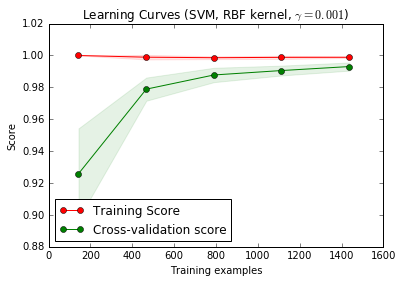

In [90]:
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, '-o', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean,  '-o', color='g', label='Cross-validation score')
plt.legend(loc='best')